In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
f = open('WhatsApp Chat with Trishita Roy.txt','r',encoding ='utf-8')

In [3]:
data =f.read()

In [4]:
#print(data)

In [5]:
# pattern ='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w{2}\s-\s'

In [7]:
messages = re.split(pattern,data)[1:]

In [8]:
#messages

In [9]:
dates = re.findall(pattern,data)
dates

['20/06/2020, 4:36 pm - ',
 '20/06/2020, 4:36 pm - ',
 '20/06/2020, 5:18 pm - ',
 '20/06/2020, 5:19 pm - ',
 '20/06/2020, 5:19 pm - ',
 '20/06/2020, 5:21 pm - ',
 '20/06/2020, 5:21 pm - ',
 '20/06/2020, 7:13 pm - ',
 '20/06/2020, 7:13 pm - ',
 '20/06/2020, 7:13 pm - ',
 '20/06/2020, 7:14 pm - ',
 '20/06/2020, 7:49 pm - ',
 '21/06/2020, 8:51 am - ',
 '21/06/2020, 8:52 am - ',
 '21/06/2020, 10:25 am - ',
 '21/06/2020, 10:25 am - ',
 '21/06/2020, 10:25 am - ',
 '21/06/2020, 12:42 pm - ',
 '21/06/2020, 12:43 pm - ',
 '21/06/2020, 12:43 pm - ',
 '21/06/2020, 1:00 pm - ',
 '21/06/2020, 1:00 pm - ',
 '21/06/2020, 1:00 pm - ',
 '21/06/2020, 4:30 pm - ',
 '21/06/2020, 4:30 pm - ',
 '21/06/2020, 4:30 pm - ',
 '21/06/2020, 4:30 pm - ',
 '21/06/2020, 4:32 pm - ',
 '21/06/2020, 4:32 pm - ',
 '21/06/2020, 7:55 pm - ',
 '21/06/2020, 7:56 pm - ',
 '21/06/2020, 7:56 pm - ',
 '21/06/2020, 7:56 pm - ',
 '21/06/2020, 10:04 pm - ',
 '22/06/2020, 9:38 am - ',
 '22/06/2020, 9:38 am - ',
 '23/06/2020, 1:04 pm

In [10]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')

df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2020-06-20 16:36:00
1,Sristi: Its sristi here...save the no.\n,2020-06-20 16:36:00
2,Trishita Roy: Who is this sristi? I don't know...,2020-06-20 17:18:00
3,Trishita Roy: Is it your own number?\n,2020-06-20 17:19:00
4,Trishita Roy: Then send this number to a swimm...,2020-06-20 17:19:00


In [11]:
df.shape

(3761, 2)

In [12]:
# separate user and messages

users = []
messages= []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:#user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)

In [13]:
df.head()

,date,user,message
0,2020-06-20 16:36:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-06-20 16:36:00,Sristi,Its sristi here...save the no.\n
2,2020-06-20 17:18:00,Trishita Roy,Who is this sristi? I don't know any sristi br...
3,2020-06-20 17:19:00,Trishita Roy,Is it your own number?\n
4,2020-06-20 17:19:00,Trishita Roy,Then send this number to a swimming pool 😂😂\n


In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [15]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2020-06-20 16:36:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020,June,20,16,36
1,2020-06-20 16:36:00,Sristi,Its sristi here...save the no.\n,2020,June,20,16,36
2,2020-06-20 17:18:00,Trishita Roy,Who is this sristi? I don't know any sristi br...,2020,June,20,17,18
3,2020-06-20 17:19:00,Trishita Roy,Is it your own number?\n,2020,June,20,17,19
4,2020-06-20 17:19:00,Trishita Roy,Then send this number to a swimming pool 😂😂\n,2020,June,20,17,19


In [16]:
df[df['user'] == 'Trishita Roy'].shape

(1564, 8)

In [17]:
words= []
for message in df['message']:
    words.extend(message.split())

In [18]:
len(words)

17894

In [19]:
df[df['message'] == '<Media omitted>\n'].shape[0]

374

In [20]:
#print(df) 


In [21]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have URL stackflow.com as an example google.com, http://facebook.com, ftp://url.in.")
print(urls)

['www.gmail.com', 'stackflow.com', 'google.com', 'http://facebook.com', 'ftp://url.in']


In [22]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [23]:
len(links)

6

In [24]:
#df


In [25]:
x=df['user'].value_counts().head()

In [26]:
import matplotlib.pyplot as plt

In [27]:
name =x.index
count =x.values

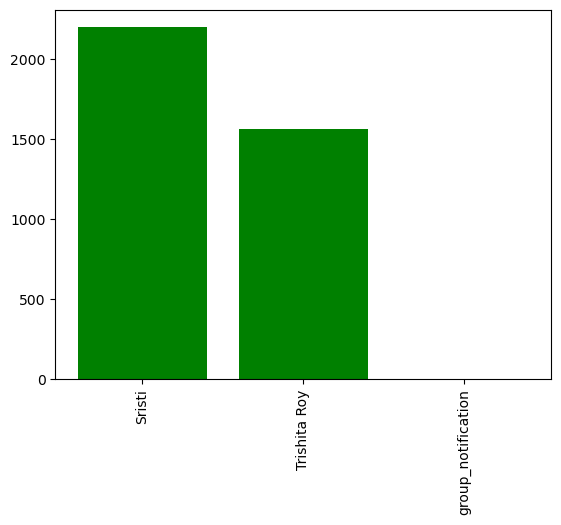

In [28]:
plt.bar(name,count,color='green')
plt.xticks(rotation='vertical')
plt.show()

In [29]:
round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})

,name,percent
0,Sristi,58.39
1,Trishita Roy,41.58
2,group_notification,0.03


In [30]:
# remove group notifications nad media omitted message


temp=df[df['user'] != 'group_notification']
temp=temp[temp['message'] !='<Media omitted>\n']

In [31]:
# remove stop words 
f = open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [32]:
words =[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    
    

In [33]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,ami,270
1,tui,172
2,tor,167
3,kore,159
4,amr,115
5,didi,109
6,😂,109
7,hya,95
8,hobe,81
9,college,67


In [34]:
!pip install emoji==1.2.0

In [35]:
import emoji
import re

In [36]:
 #emoji_version ='1.5.1'

In [37]:
# emojis = []
# # for message in df['message']:
# #     emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
# for message in df['message']:
#     emojis.extend([c for c in message if c in emoji.emojize(":")])

In [45]:
import emoji
import re

emojis = []
for message in df['message']:
    message_emojized = emoji.demojize(message)
    emojis.extend(re.findall(r':[a-z_]+:', message_emojized))

In [46]:
# emojis = []
# for message in df['message']:
#     message_emojized = emoji.demojize(message)
#     emojis.extend(re.findall(r':[a-z_]+:', message_emojized))
    
# emoji_counts = pd.DataFrame(emojis, columns=['emoji'])
# emoji_counts = emoji_counts['emoji'].value_counts().reset_index(name='count')
# emoji_counts = emoji_counts.rename(columns={'index': 'emoji'})
# emoji_counts['emoji'] = emoji_counts['emoji'].apply(lambda x: emoji.emojize(x))


In [47]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,:face_with_tears_of_joy:,716
1,:rolling_on_the_floor_laughing:,281
2,:slightly_smiling_face:,121
3,:expressionless_face:,94
4,:pleading_face:,72
...,...,...
70,:face_with_spiral_eyes:,1
71,:confused_face:,1
72,:neutral_face:,1
73,:socks:,1


In [41]:
print('\U0001F600')  # should display the grinning face emoji


😀


In [42]:
# emoji_counts = Counter(emojis)

# emoji_df = pd.DataFrame(emoji_counts.most_common(len(emoji_counts)), columns=['Emoji', 'Count'])

# # Print the DataFrame
# print(emoji_df)

In [43]:
# plt.bar(emoji_df[0].head(),emoji_df[1].head())

In [44]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()
df['month_num'] = pd.to_datetime(df['month'], format='%B').dt.month

KeyError: 'month_num'

In [ ]:
timeline

In [ ]:
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [ ]:
timeline['time'] =time

In [ ]:
timeline


In [ ]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['only_date']= df['date'].dt.date

In [ ]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])


In [ ]:
df.head()

In [ ]:
df['day_name']= df['date'].dt.day_name()

In [ ]:
df['day_name'].value_counts()

In [ ]:
df.head()

In [ ]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour== 23:
        period.append(str(hour) + "-" +str('00'))
        
    elif hour ==0:
        period.append(str('00') + "-" + str(hour+1))
        
    else:
        period.append(str(hour) + '-' + str(hour-1))

In [ ]:
df['period']=period

In [ ]:
df.sample(5)

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [ ]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)